- Run first notebnook before using this one
- [Official HuggingFace tutorial](https://huggingface.co/blog/stable_diffusion)

In [1]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from time import time
from slugify import slugify

- Load model from disk (you only have it if you ran successfully the first notebook)

In [2]:
# model = StableDiffusionPipeline.from_pretrained(
#     'models/stable-diffusion-v1.4',
#     revision='fp16',
#     torch_dtype=torch.float16
# )
# model.to('cuda')
# model.device

In [3]:
model = StableDiffusionPipeline.from_pretrained(
    'models/stable-diffusion-v1.5',
    revision='fp16',
    torch_dtype=torch.float16
)
model.to('cuda')
model.device

device(type='cuda', index=0)

In [9]:
model.safety_checker = (lambda images, clip_input: (images, False))

- Set random seed for repeatability

In [4]:
seed_generator = torch.Generator('cuda').manual_seed(42)

- Generate image from prompt

In [92]:
def make_n_images(prompt):

    # prompt      = "chicken, art deco portrait, elegant, intricate, digital painting, artstation, concept art, smooth, sharp focus, illustration"
    repetitions = 4

    with autocast('cuda'):
        for r in range(repetitions):
            output = model(
                prompt,
                generator=seed_generator,
                num_inference_steps=50, # diffusion iterations
                guidance_scale=7.5,     # adherence to text, default 7.5
                width=512,
                height=512,
            )

            image = output.images[0]
            image.save(f'images/{time()}_{slugify(prompt[:100])}.png')
            display(image)

  0%|          | 0/51 [00:00<?, ?it/s]

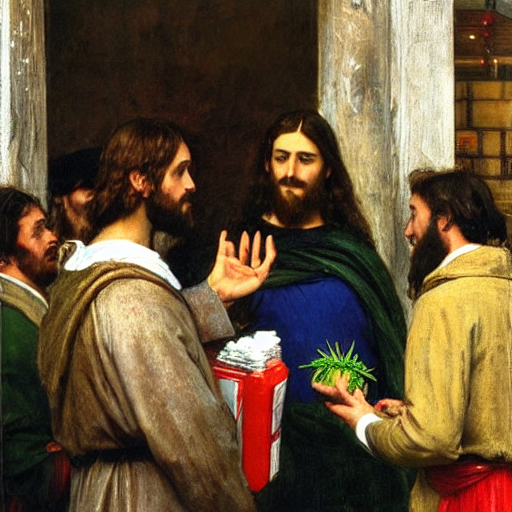

  0%|          | 0/51 [00:00<?, ?it/s]

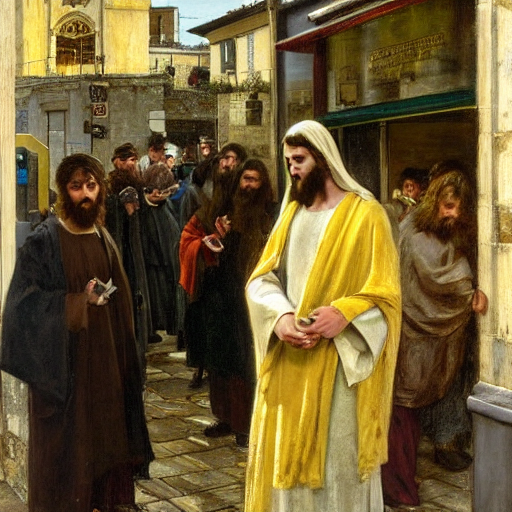

  0%|          | 0/51 [00:00<?, ?it/s]

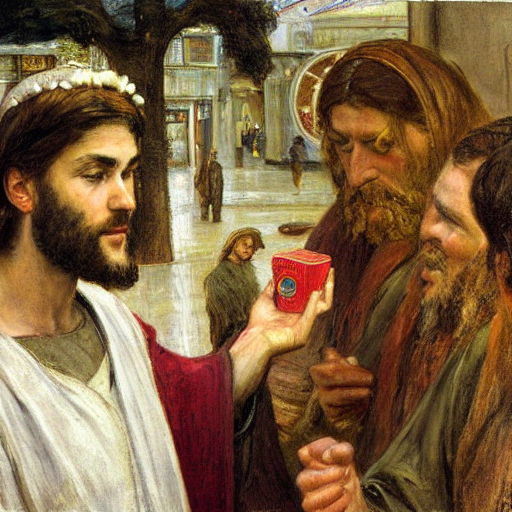

  0%|          | 0/51 [00:00<?, ?it/s]

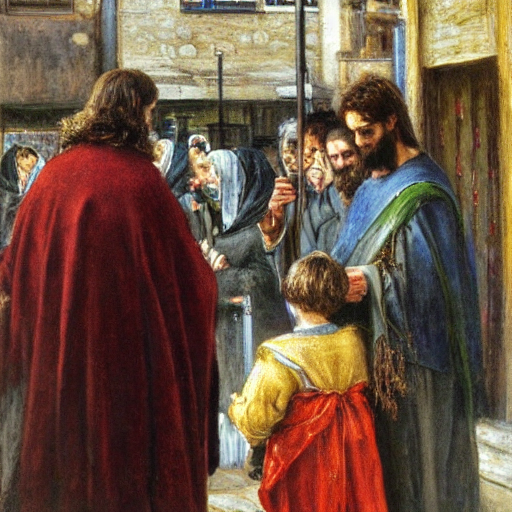

In [94]:
# prompt = "zommed in jesus christ building a sand castle, jesus christ bright halo around the head, small intricate sand castle, umbrellas and towels on the beach, by John Everett Millais, oil on canvas, Pre-Raphaelite style, detailed water, sandy beach"
# prompt = "masterwork oil on canvas of jesus christ building the perfect sandcastle by John Everett Millais"

# prompt = "zoomed-in masterwork oil on canvas, portrait of jesus christ man holding two icecream cones, forest in the background, by John Everett Millais"

# prompt = "jesus christ in a bathrobe, holding an icecream cone in the right hand, standing in the swimming pool side, his parents garden in the background, by John Everett Millais, detailed leaves, intricate detail, chestnut tree and strawberry plants, big mac boxes laying in the background"

# prompt = "jesus christ in a rollercoaster car, holding an icecream cone in the right hand, standing in disneyland park, disney characters in the background, by John Everett Millais, detailed leaves, intricate detail, intricate disneyland park in the background"

# prompt = "jesus christ standing in front of disneyland castle and gardens by John Everett Millais intricately detailed flora preraphaelite disney decors zoom on jesus christ face"
# prompt = "saint with halo Jesus Christ man holding a hamburger in front of a very detailed macdonalds restaurant in nazareth by John Everett Millais"
prompt = "Jesus Christ man detailed face handing out bigmac hamburgers in front of a macdonalds restaurant in nazareth by John Everett Millais"
make_n_images(prompt)